In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Load and prepare the data
def load_data(filename):
    df = pd.read_csv(filename)
    X = df['SIZE'].values
    y = df['PRICE'].values
    return X, y

def mean_squared_error(y_true, y_pred):
    """
    Compute Mean Squared Error between true values and predictions
    
    Args:
        y_true: Array of true values
        y_pred: Array of predicted values
    
    Returns:
        float: Mean squared error value
    """
    return np.mean((y_true - y_pred) ** 2)

def gradient_descent(X, y, m, c, learning_rate):
    """
    Perform one step of gradient descent to update weights
    
    Args:
        X: Input features (office sizes)
        y: Target values (office prices)
        m: Current slope
        c: Current y-intercept
        learning_rate: Learning rate for gradient descent
    
    Returns:
        tuple: Updated slope and y-intercept
    """
    N = len(X)
    y_pred = m * X + c
    
    # Calculate gradients
    dm = (-2/N) * np.sum(X * (y - y_pred))
    dc = (-2/N) * np.sum(y - y_pred)
    
    # Update parameters
    m = m - learning_rate * dm
    c = c - learning_rate * dc
    
    return m, c



In [3]:
def train_model(X, y, epochs=10, learning_rate=0.0001):
    """
    Train the linear regression model using gradient descent
    
    Args:
        X: Input features (office sizes)
        y: Target values (office prices)
        epochs: Number of training epochs
        learning_rate: Learning rate for gradient descent
    
    Returns:
        tuple: Final slope and y-intercept
    """
    # Initialize random weights
    m = np.random.randn()
    c = np.random.randn()
    
    print("Initial parameters: m =", m, ", c =", c)
    print("\nTraining Progress:")
    print("-----------------")
    
    for epoch in range(epochs):
        # Make predictions
        y_pred = m * X + c
        
        # Calculate error
        error = mean_squared_error(y, y_pred)
        print(f"Epoch {epoch + 1}: MSE = {error:.4f}")
        
        # Update parameters using gradient descent
        m, c = gradient_descent(X, y, m, c, learning_rate)
    
    return m, c

def plot_regression_line(X, y, m, c):
    """
    Plot the data points and the regression line
    
    Args:
        X: Input features (office sizes)
        y: Target values (office prices)
        m: Slope of the line
        c: Y-intercept of the line
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    
    # Generate points for the regression line
    X_line = np.array([min(X), max(X)])
    y_line = m * X_line + c
    plt.plot(X_line, y_line, color='red', label='Regression line')
    
    plt.xlabel('Office Size (sq. ft.)')
    plt.ylabel('Office Price')
    plt.title('Linear Regression: Office Price vs Size')
    plt.legend()
    plt.grid(True)
    plt.show()



Starting training...
Initial parameters: m = -0.698911244322886 , c = -2.3263323167589287

Training Progress:
-----------------
Epoch 1: MSE = 11581.6349
Epoch 2: MSE = 2745.3397
Epoch 3: MSE = 694.8787
Epoch 4: MSE = 219.0696
Epoch 5: MSE = 108.6581
Epoch 6: MSE = 83.0372
Epoch 7: MSE = 77.0918
Epoch 8: MSE = 75.7122
Epoch 9: MSE = 75.3921
Epoch 10: MSE = 75.3178

Final parameters: m = 1.4064405259310024 , c = -2.285287313580419


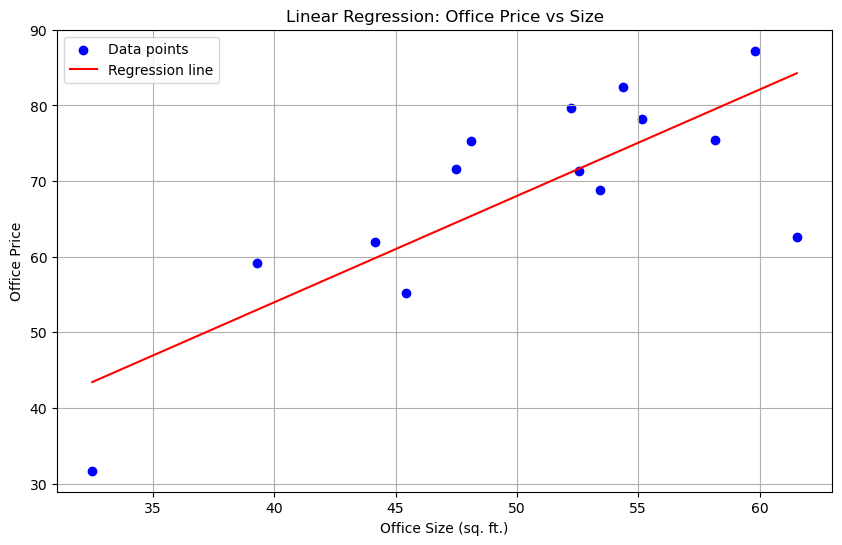


Predicted price for office size 100 sq. ft.: 138.36


In [4]:
# Main execution
if __name__ == "__main__":
    # Load the data
    X, y = load_data('Nairobi Office Price Ex.csv')
    
    # Train the model
    print("Starting training...")
    final_m, final_c = train_model(X, y)
    print("\nFinal parameters: m =", final_m, ", c =", final_c)
    
    # Plot the regression line
    plot_regression_line(X, y, final_m, final_c)
    
    # Predict price for 100 sq. ft.
    test_size = 100
    predicted_price = final_m * test_size + final_c
    print(f"\nPredicted price for office size {test_size} sq. ft.: {predicted_price:.2f}")
